### 第9回レポート課題その2

まず, seq2seqの評価を行う.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 20

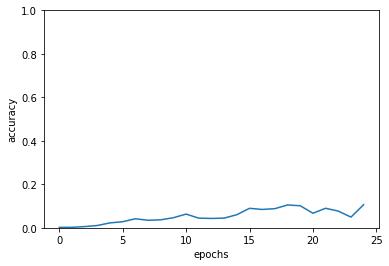

In [2]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/deep-learning-from-scratch-2-master/')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model / optimizer / trainer の生成
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# seq2seqの学習
acc_list = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list)
plt.ylim([0.0,1.0])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

最終的な結果も10.64%とあまり良いとはいえない. 

次に入力データの反転を行って評価を行う.

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 20[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 21[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48

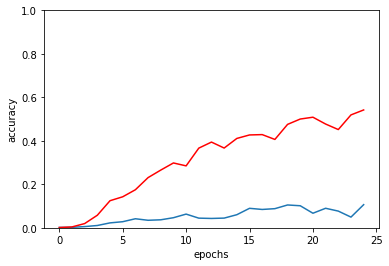

In [3]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')

x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

char_to_id, id_to_char = sequence.get_vocab()


# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model / optimizer / trainer の生成
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# seq2seqの学習
acc_list2 = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list2.append(acc)
  print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, label='baseline')
x2 = np.arange(len(acc_list2))
plt.plot(x2, acc_list2, color="r", label='reverse')
plt.ylim([0.0,1.0])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

正解率が54%と反転するだけで, およそ5倍の正解率を得た. 

PeeckyDecoderクラスを用いて評価を行った. このとき, 入力データの反転も行った.

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 4[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 8[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 12[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 13[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 16[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 20[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 22[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 23[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  4

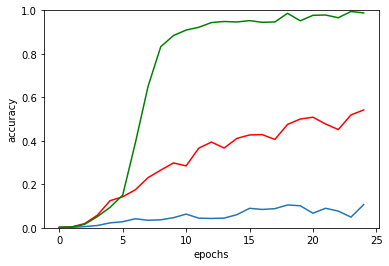

In [4]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')

x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

char_to_id, id_to_char = sequence.get_vocab()


# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# model / optimizer / trainer の生成
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# seq2seqの学習
acc_list3 = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list3.append(acc)
  print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, label='baseline')
x2 = np.arange(len(acc_list2))
plt.plot(x2, acc_list2, color="r", label='reverse')
x3 = np.arange(len(acc_list3))
plt.plot(x2, acc_list3, color="g", label='reverse + peeky')
plt.ylim([0.0,1.0])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

エポック数が9の時点で正答率が8割を超えており, 前2つと比べてかなり向上している. その後も徐々に上がっており, 最終的には98.8%という結果を得た.

最後に入力データの反転を行わないでPeeckyDecoderクラスを用いた評価を行った.

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.49
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 4[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.84
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.80
| epoch 1 |  iter 121 / 351 | time 8[s] | loss 1.79
| epoch 1 |  iter 141 / 351 | time 9[s] | loss 1.77
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 181 / 351 | time 12[s] | loss 1.76
| epoch 1 |  iter 201 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 221 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 241 / 351 | time 16[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 20[s] | loss 1.73
| epoch 1 |  iter 321 / 351 | time 22[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 23[s] | loss 1.73
Q 77+85  
T 162 
☒ 107 
---
Q 975+164
T 1139
☒ 1011
---
Q 58

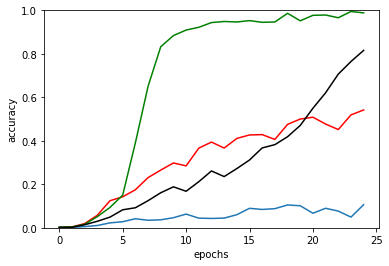

In [6]:
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')

# model / optimizer / trainer の生成
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

# seq2seqの学習
acc_list4 = []
for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

  acc = float(correct_num) / len(x_test)
  acc_list4.append(acc)
  print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, label='baseline')
x2 = np.arange(len(acc_list2))
plt.plot(x2, acc_list2, color="r", label='reverse')
x3 = np.arange(len(acc_list3))
plt.plot(x2, acc_list3, color="g", label='reverse + peeky')
x4 = np.arange(len(acc_list4))
plt.plot(x2, acc_list4, color="k", label='peeky')
plt.ylim([0.0,1.0])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

反転を行った場合よりは正答率が減少したが, 80%を超えた. また, 特定のエポック間で正答率が急激に上昇するのではなくエポック数が増えるごとに正解率も上がった. Seq2seqクラスの場合に比べて上昇率が下がったが, これはもともとの正答率の高さにあったと考えた.

### 感想
seq2seqの仕組みは理解できた. これを用いたものは興味を引くものが多かったが特にイメージキャプションは面白そうだと思った.

### 参考文献
斎藤 康毅　『ゼロから作るDeep Learning②自然言語処理編』, 2018, オライリー・ジャパン, p.277-324